In [39]:
import pathlib
import matplotlib
import mne
import mne_bids


In [40]:
bids_root=pathlib.Path('out_data/sample_BIDS')

In [41]:
bids_path=mne_bids.BIDSPath(subject='01',
                            session='01',
                            task='audiovisual',
                            run='01',
                            datatype='meg',
                            root=bids_root
)
raw

<Raw | sub-01_ses-01_task-audiovisual_run-01_meg.fif, 376 x 166800 (277.7 s), ~479.0 MB, data loaded>

In [42]:
raw=mne_bids.read_raw_bids(bids_path)
raw.load_data()
raw.filter(l_freq=0.1,h_freq=40)
events,events_id=mne.events_from_annotations(raw)

Opening raw data file out_data\sample_BIDS\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_meg.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading events from out_data\sample_BIDS\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_events.tsv.
Reading channel info from out_data\sample_BIDS\sub-01\ses-01\meg\sub-01_ses-01_task-audiovisual_run-01_channels.tsv.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Used Annotations descriptions: ['Auditory/left', 'Auditory/right', 'Button', 'Smiley', 'Visual/Left', 'Visual/Right']


[Parallel(n_jobs=1)]: Done 366 out of 366 | elapsed:    4.6s finished


In [43]:
events_id

{'Auditory/left': 1,
 'Auditory/right': 2,
 'Button': 3,
 'Smiley': 4,
 'Visual/Left': 5,
 'Visual/Right': 6}

In [45]:
tmin= -0.2
tmax=.8
baseline=(None,0)
epochs=mne.Epochs(raw,
                    events=events
                    ,event_id=events_id,
                    tmin=tmin,
                    tmax=tmax,
                    baseline=baseline,
                    preload=True
                   )
epochs

Not setting metadata
320 matching events found
Setting baseline interval to [-0.19979521315838786, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Using data from preloaded Raw for 320 events and 601 original time points ...
0 bad epochs dropped


Number of events,320
Events,Auditory/left: 72Auditory/right: 73Button: 16Smiley: 15Visual/Left: 73Visual/Right: 71
Time range,-0.200 – 0.799 sec
Baseline,-0.200 – 0.000 sec


In [46]:
epochs.plot()

Waiting for Loading-Thread to finish... (max. 10 sec)
Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
['MEG 2443', 'EEG 053']


In [ ]:
%matplotlib inline


In [ ]:
epochs['Auditory'].plot()

In [ ]:
epochs['Visual'].plot_image(picks='eeg')

In [47]:
epochs.save(pathlib.Path('out_data')/'epochs_epo.fif',
           overwrite=True)

Overwriting existing file.


In [48]:
evoked_auditory=epochs['Auditory'].average()
evoked_visual=epochs['Visual'].average()

In [49]:
evoked_auditory

<Evoked | '0.50 × Auditory/left + 0.50 × Auditory/right' (average, N=145), -0.1998 – 0.79918 sec, baseline -0.199795 – 0 sec, 366 ch, ~2.1 MB>

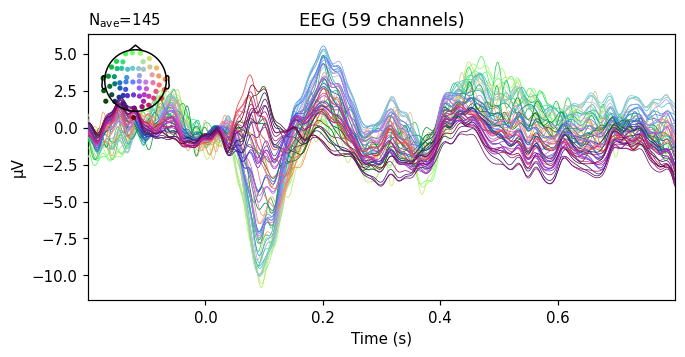

In [57]:
%matplotlib tk
evoked_auditory.plot(spatial_colors=True,picks='eeg')

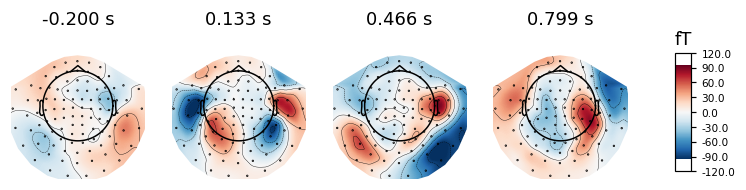

In [58]:
evoked_auditory.plot_topomap(ch_type='mag')

Projections have already been applied. Setting proj attribute to True.
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


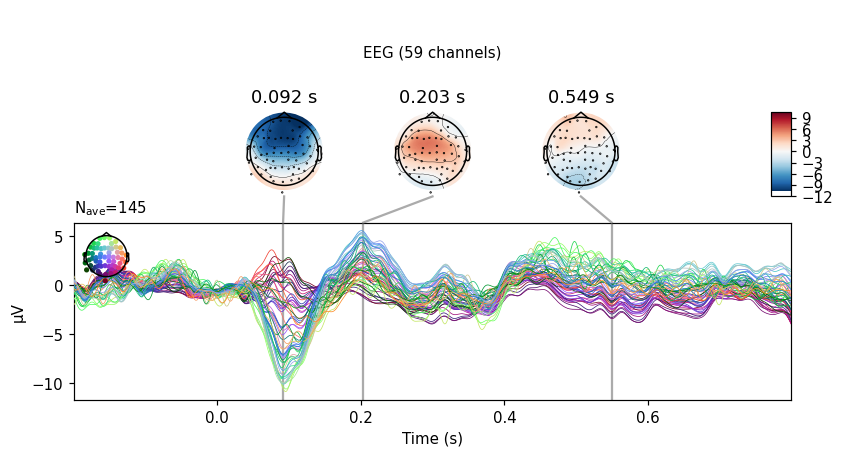

In [59]:
evoked_auditory.plot_joint(picks='eeg')

In [61]:
mne.viz.plot_compare_evokeds([evoked_auditory,evoked_visual],picks='eeg')

combining channels using "gfp"
combining channels using "gfp"


[<Figure size 864x648 with 1 Axes>]

In [63]:
mne.write_evokeds(fname=pathlib.Path('out_data')/'evokeds_ave.fif',
                 evoked=[evoked_auditory,evoked_visual])


In [ ]:
evokeds=mne.read_evokeds(f)